# Практическое задание: Линейная регрессия и EDA

## Цель задания
В этом практическом задании вам предстоит выполнить полный анализ данных страховой компании, включая:
1. Разведочный анализ данных (EDA)
2. Визуализацию данных
3. Построение и оценку модели линейной регрессии

## Описание данных
Набор данных содержит информацию о страховых взносах и различных характеристиках клиентов:
- age: возраст
- sex: пол
- bmi: индекс массы тела
- children: количество детей
- smoker: статус курильщика
- region: регион проживания
- charges: страховые выплаты (целевая переменная)

## Задачи
1. Загрузка и первичный анализ данных
2. Очистка и предобработка данных
3. Разведочный анализ данных (EDA)
4. Статистический анализ
5. Подготовка признаков
6. Построение модели линейной регрессии
7. Оценка модели
8. Визуализация результатов

## Задание 1: Загрузка и первичный анализ данных

1. Загрузите библиотеки:
   - pandas для работы с данными
   - numpy для математических операций
   - matplotlib и seaborn для визуализации
   - scipy.stats для статистических тестов

2. Загрузите датасет 'insurance.csv'

3. Выполните первичный анализ данных:
   - Проверьте размерность данных
   - Выведите первые 5 строк
   - Проверьте типы данных
   - Проверьте наличие пропущенных значений
   - Выведите основные статистические характеристики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("insurance.csv")

print("Размерность данных:", df.shape)
print("\nПервые 5 строк:\n", df.head())
print("\nТипы данных:\n", df.dtypes)
print("\nПропущенные значения:\n", df.isnull().sum())
print("\nОсновные статистические характеристики:\n", df.describe())

Размерность данных: (1338, 7)

Первые 5 строк:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Типы данных:
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Пропущенные значения:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Основные статистические характеристики:
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493 

## Задание 2: Очистка и предобработка данных

1. Проверьте данные на наличие выбросов:
   - Используйте boxplot для числовых переменных
   - Определите наличие выбросов с помощью IQR
   - Примите решение о методе обработки выбросов

2. Проверьте распределение категориальных переменных:
   - Подсчитайте количество уникальных значений
   - Постройте графики распределения

3. Проведите необходимую предобработку:
   - Обработайте выбросы (если необходимо)
   - Преобразуйте категориальные переменные
   - Сохраните предобработанные данные

age: выбросов = 0
bmi: выбросов = 9
children: выбросов = 0
charges: выбросов = 139

sex уникальные значения:
 sex
female    610
male      581
Name: count, dtype: int64

smoker уникальные значения:
 smoker
no     1055
yes     136
Name: count, dtype: int64

region уникальные значения:
 region
northwest    305
southeast    301
northeast    295
southwest    290
Name: count, dtype: int64


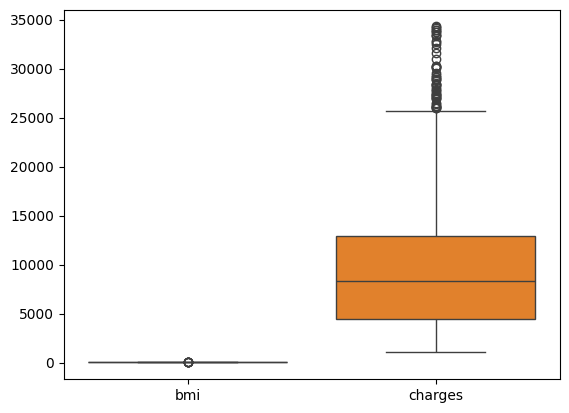

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("insurance.csv")
num_cols = ['age', 'bmi', 'children', 'charges']
#for col in num_cols:
#    plt.figure()
#    sns.boxplot(x=df[col])
#    plt.title(f'Boxplot для {col}')
#    plt.show()
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col}: выбросов = {len(outliers)}")


for col in ['bmi', 'charges']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    print(f"\n{col} уникальные значения:\n", df[col].value_counts())
    

df = pd.get_dummies(df, drop_first=True)

df.to_csv("insurance_preprocessed.csv", index=False)

ndf = pd.read_csv("insurance_preprocessed.csv")
sns.boxplot(data=ndf[['bmi', 'charges']])
plt.show()

## Задание 3: Разведочный анализ данных (EDA)

1. Выполните анализ распределений:
   - Постройте гистограммы для числовых переменных
   - Проверьте нормальность распределений с помощью QQ-plots
   - Визуализируйте распределения с помощью KDE plots

2. Исследуйте взаимосвязи между переменными:
   - Постройте корреляционную матрицу
   - Создайте scatter plots для пар числовых переменных
   - Проанализируйте взаимосвязи с помощью box plots для категориальных переменных

3. Проведите анализ целевой переменной (charges):
   - Исследуйте её распределение
   - Проанализируйте зависимости с другими переменными
   - Проверьте наличие нелинейных связей

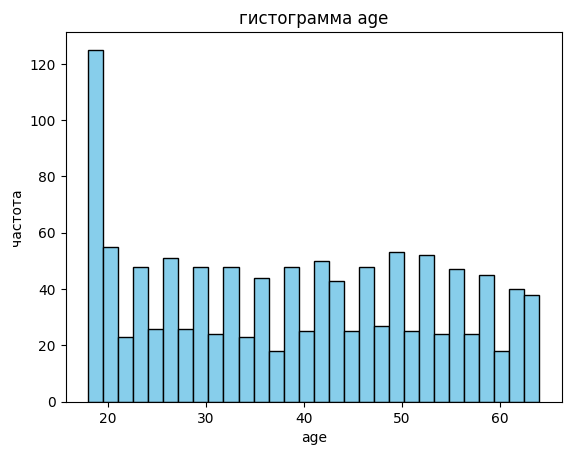

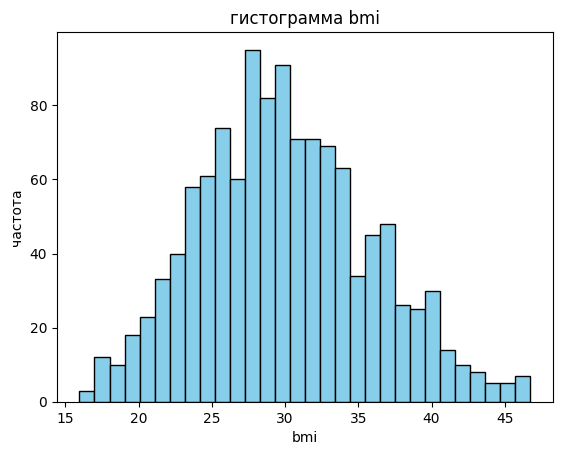

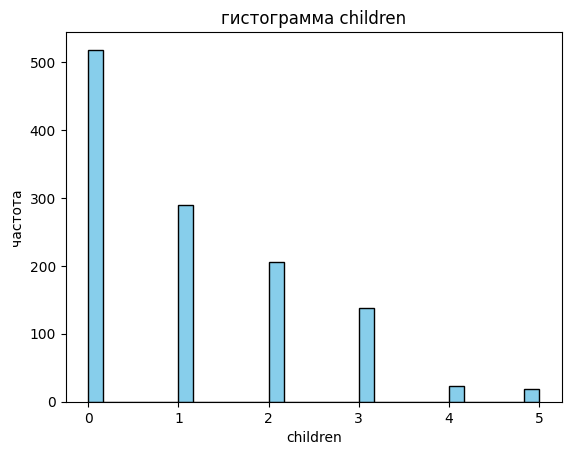

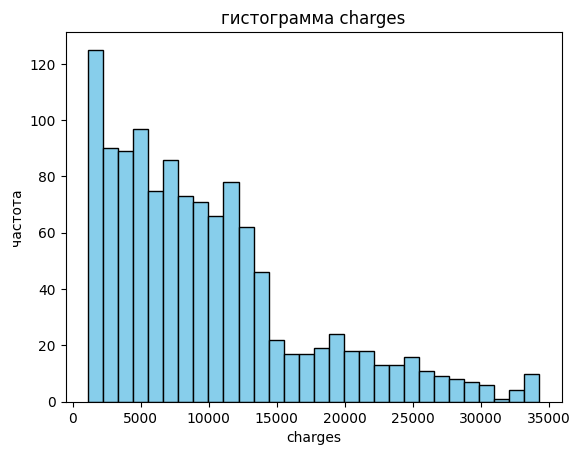

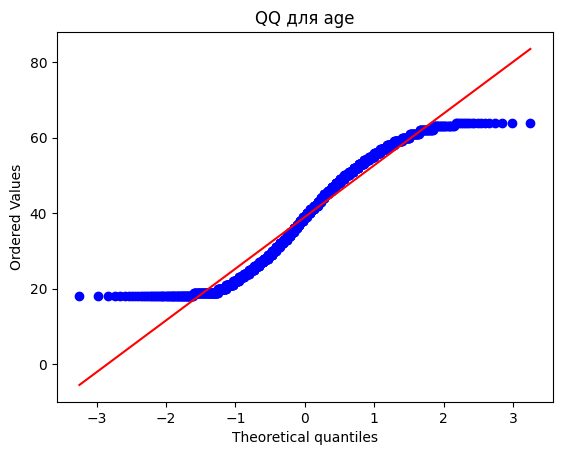

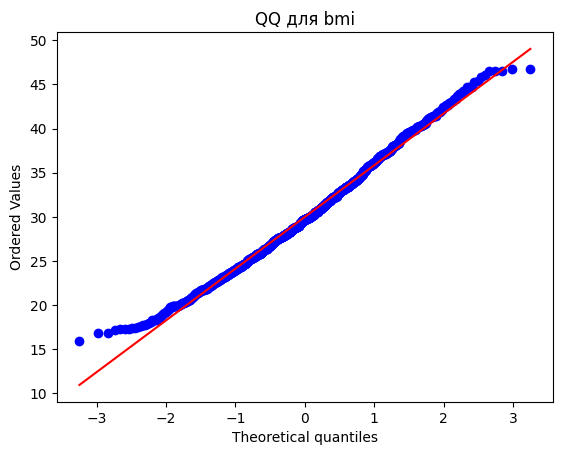

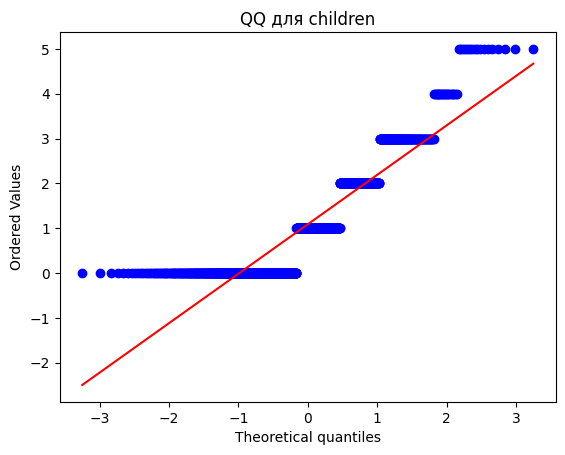

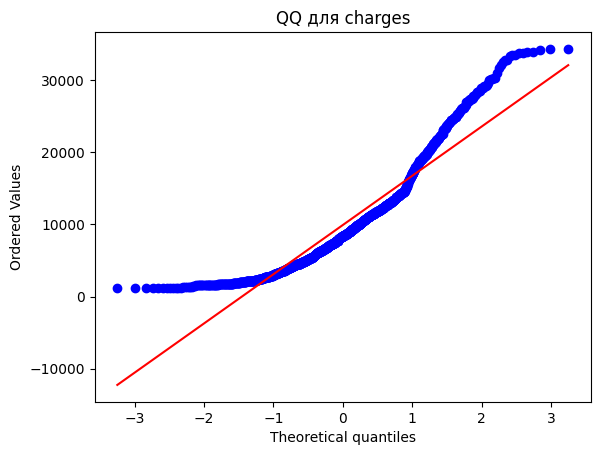

C:\Users\petrk\AppData\Local\Temp\ipykernel_20808\3832386543.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


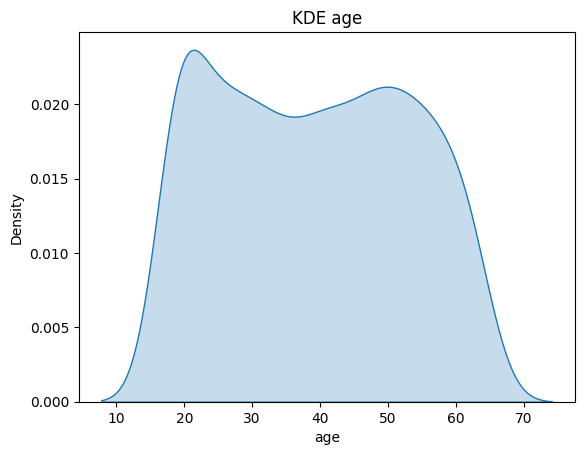

C:\Users\petrk\AppData\Local\Temp\ipykernel_20808\3832386543.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


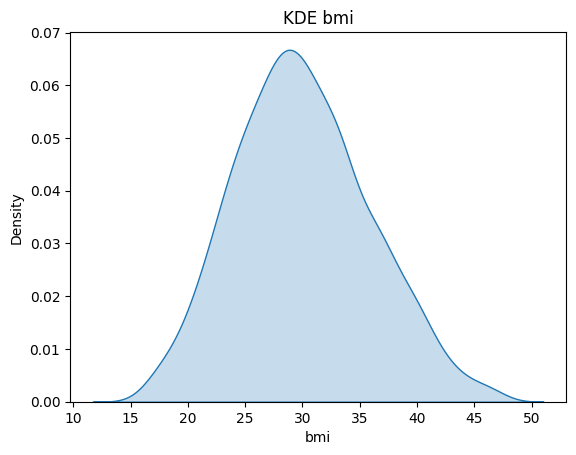

C:\Users\petrk\AppData\Local\Temp\ipykernel_20808\3832386543.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


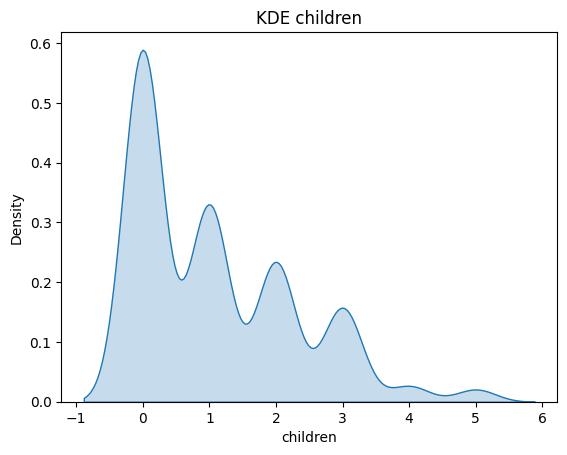

C:\Users\petrk\AppData\Local\Temp\ipykernel_20808\3832386543.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


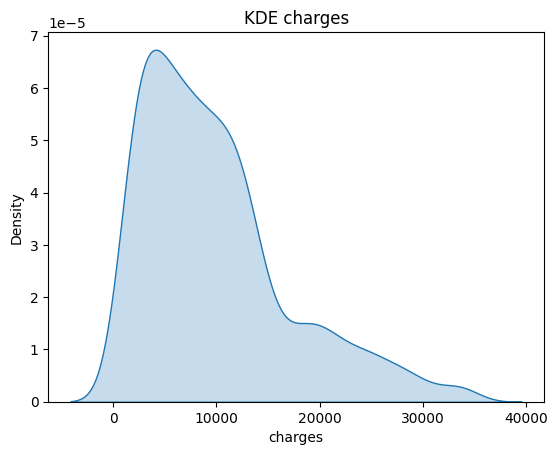

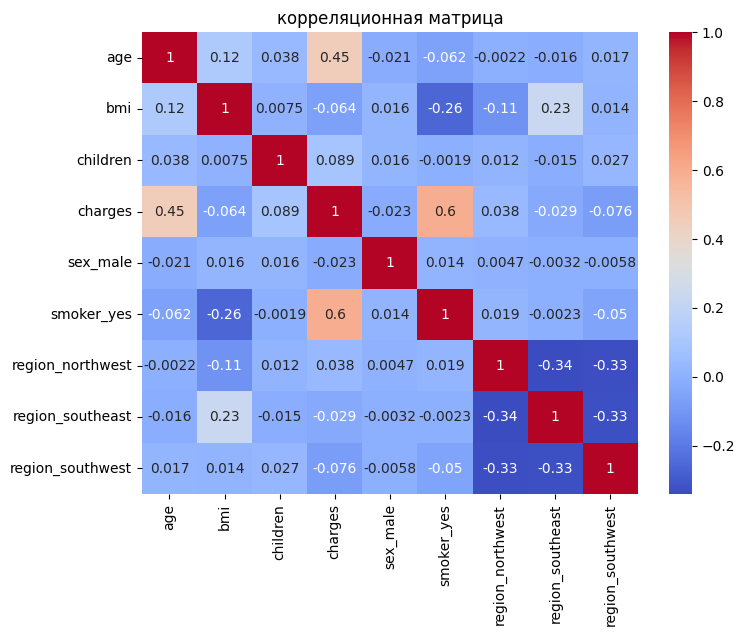

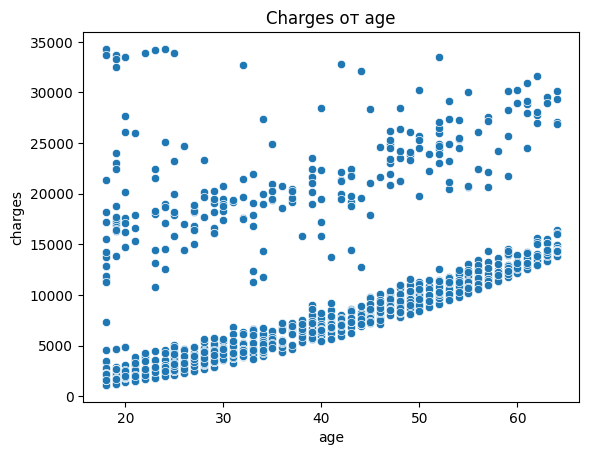

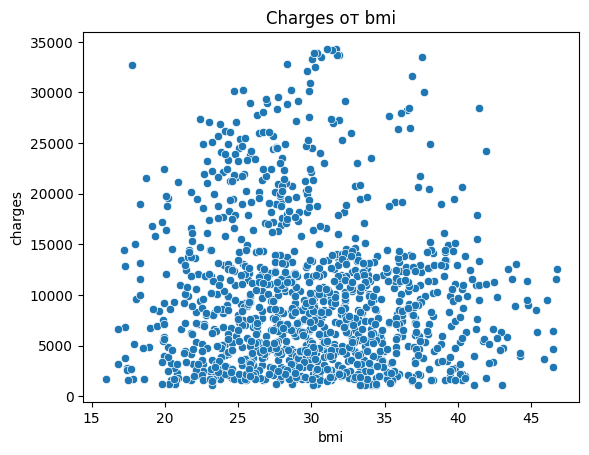

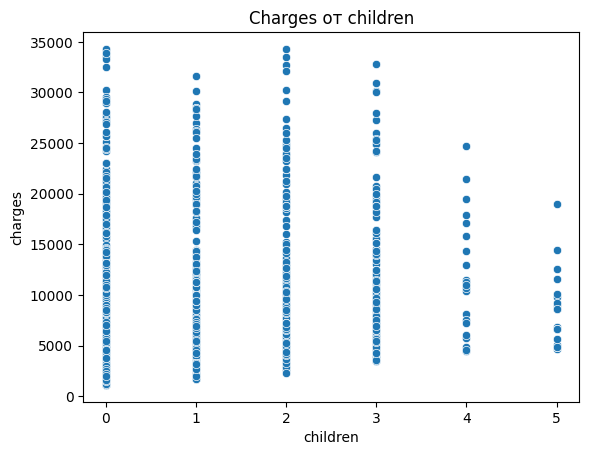

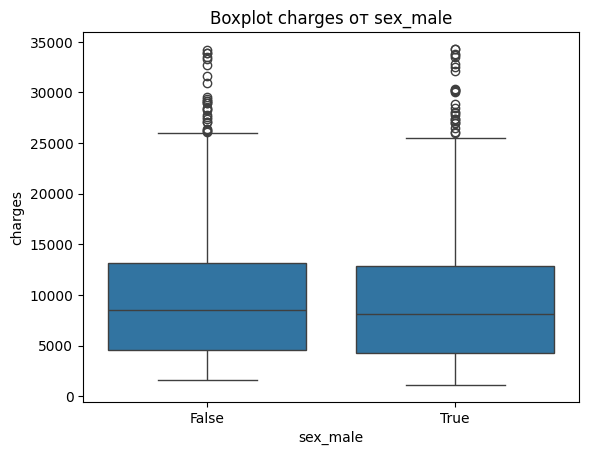

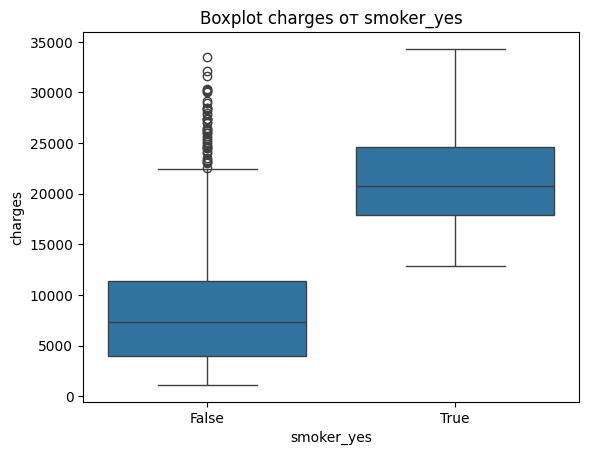

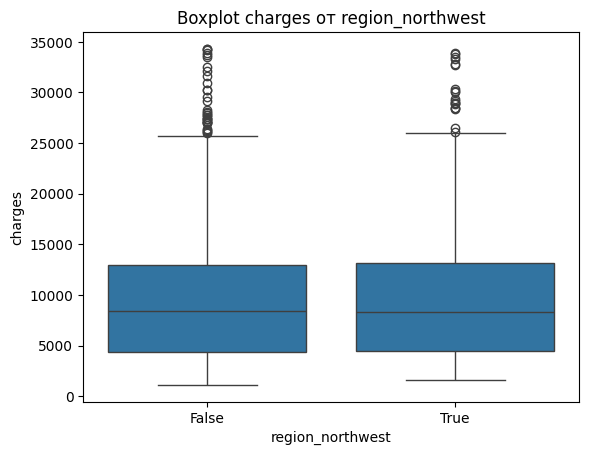

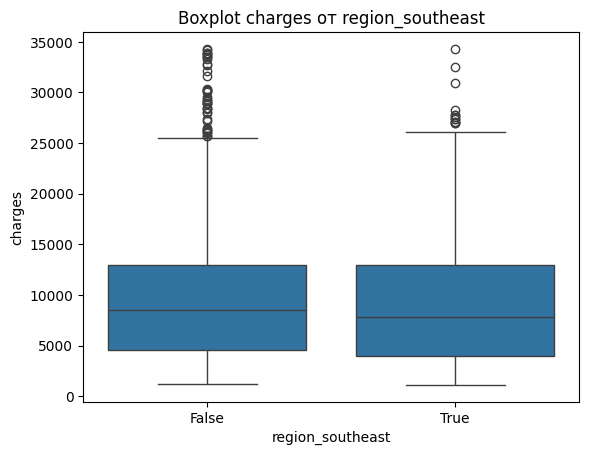

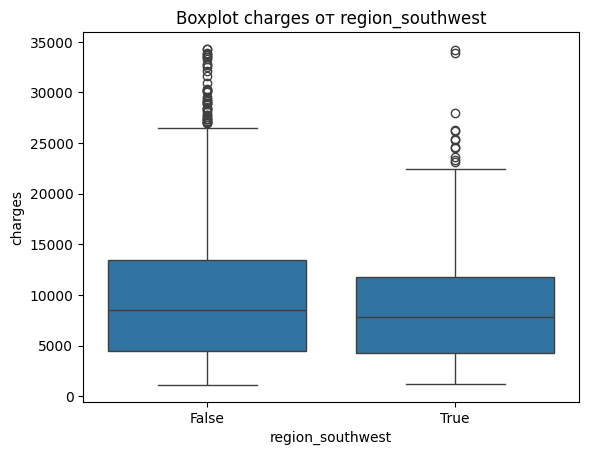

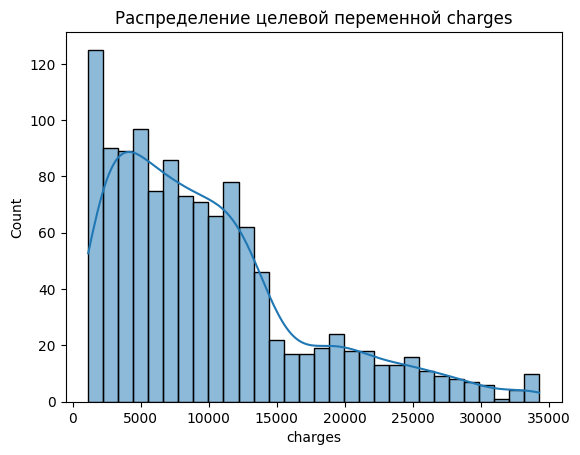

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("insurance_preprocessed.csv")
num_cols = ['age', 'bmi', 'children', 'charges']

for col in num_cols:
    plt.figure()
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'гистограмма {col}')
    plt.xlabel(col)
    plt.ylabel('частота')
    plt.show()

for col in num_cols:
    plt.figure()
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ для {col}')
    plt.show()

for col in num_cols:
    plt.figure()
    sns.kdeplot(df[col], shade=True)
    plt.title(f'KDE {col}')
    plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('корреляционная матрица')
plt.show()

for x in ['age', 'bmi', 'children']:
    plt.figure()
    sns.scatterplot(x=df[x], y=df['charges'])
    plt.title(f'Charges от {x}')
    plt.show()

cat_cols = [col for col in df.columns if df[col].nunique() == 2 or 'region' in col]
for col in cat_cols:
    plt.figure()
    sns.boxplot(x=df[col], y=df['charges'])
    plt.title(f'Boxplot charges от {col}')
    plt.show()

plt.figure()
sns.histplot(df['charges'], bins=30, kde=True)
plt.title('Распределение целевой переменной charges')
plt.show()

## Задание 4: Статистический анализ

1. Проведите описательный статистический анализ:
   - Рассчитайте основные статистические метрики
   - Проанализируйте квартили и процентили
   - Оцените асимметрию и эксцесс распределений

2. Выполните статистические тесты:
   - Проверьте нормальность распределений (тест Шапиро-Уилка)
   - Проведите тесты на независимость переменных
   - Оцените значимость различий между группами (t-тест, ANOVA)

3. Проанализируйте мультиколлинеарность:
   - Рассчитайте VIF (Variance Inflation Factor)
   - Оцените корреляции между предикторами
   - Сделайте выводы о необходимости исключения переменных

[18. 18. 26. 39. 51. 61. 64.]
[17.7965 20.795  25.8    29.7    33.77   40.2225 44.268 ]
[0. 0. 0. 1. 2. 3. 5.]
[ 1251.4479    1728.341     4408.6959    8347.1643   12953.5946
 24998.494345 32566.92508 ]

age: асимметрия 0.068, эксцесс -1.252

bmi: асимметрия 0.265, эксцесс -0.276

children: асимметрия 0.982, эксцесс 0.298

charges: асимметрия 1.159, эксцесс 0.949

Шапиро уилкаage: статистика 0.944, p=0.000
Распределение не нормальное

Шапиро уилкаbmi: статистика 0.992, p=0.000
Распределение не нормальное

Шапиро уилкаchildren: статистика 0.819, p=0.000
Распределение не нормальное

Шапиро уилкаcharges: статистика 0.896, p=0.000
Распределение не нормальное

Chi2 тест sex_male , smoker_yes: p=0.694

Chi2 тест sex_male , region_northwest: p=0.925

Chi2 тест sex_male , region_southeast: p=0.964

Chi2 тест sex_male , region_southwest: p=0.896

Chi2 тест smoker_yes , region_northwest: p=0.577

Chi2 тест smoker_yes , region_southeast: p=1.000

Chi2 тест smoker_yes , region_southwest: p=0.106



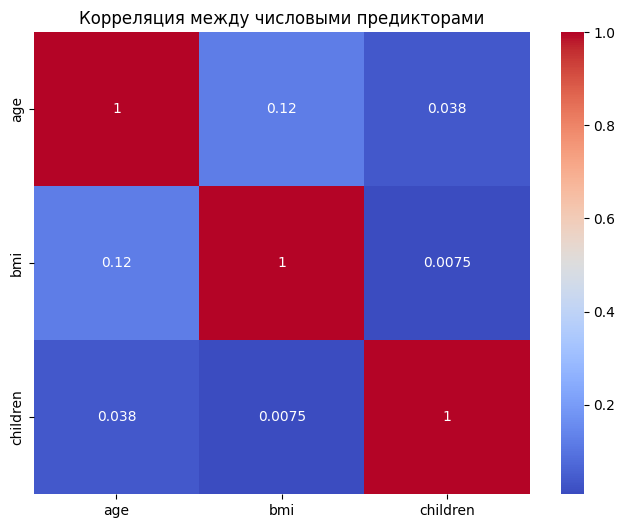

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

df = pd.read_csv("insurance_preprocessed.csv")
num_cols = ['age', 'bmi', 'children', 'charges']

percentiles = [1, 5, 25, 50, 75, 95, 99]
for col in num_cols:
    print(np.percentile(df[col], percentiles))

for col in num_cols:
    skewness = stats.skew(df[col])
    kurtosis = stats.kurtosis(df[col])
    print(f"\n{col}: асимметрия {skewness:.3f}, эксцесс {kurtosis:.3f}")

for col in num_cols:
    stat, p = stats.shapiro(df[col])
    print(f"\nШапиро уилка{col}: статистика {stat:.3f}, p={p:.3f}")
    if p > 0.05:
        print("Распределение нормальное")
    else:
        print("Распределение не нормальное")

cat_cols = [col for col in df.columns if df[col].nunique() == 2 or 'region' in col]
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        table = pd.crosstab(df[cat_cols[i]], df[cat_cols[j]])
        chi2, p, dof, expected = stats.chi2_contingency(table)
        print(f"\nChi2 тест {cat_cols[i]} , {cat_cols[j]}: p={p:.3f}")

for col in cat_cols:
    if df[col].nunique() == 2:
        groups = df.groupby(col)['charges'].apply(list)
        t_stat, p_val = stats.ttest_ind(groups.iloc[0], groups.iloc[1])
        print(f"\nTтест charges {col}: t={t_stat:.3f}, p={p_val:.3f}")

for col in cat_cols:
    if df[col].nunique() > 2:
        groups = [df['charges'][df[col]==val] for val in df[col].unique()]
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"\nANOVA charges {col}: F={f_stat:.3f}, p={p_val:.3f}")

X = df.drop(columns=['charges'])
X = X.astype(float)
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF для предикторов")
print(vif_data)

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols[:-1]].corr(), annot=True, cmap='coolwarm')
plt.title("Корреляция между числовыми предикторами")
plt.show()

## Задание 5: Подготовка признаков

1. Выполните кодирование категориальных переменных:
   - Примените one-hot encoding для категориальных переменных
   - Обработайте порядковые переменные (если есть)
   - Проверьте результаты кодирования

2. Проведите масштабирование числовых признаков:
   - Примените StandardScaler или MinMaxScaler
   - Сохраните параметры масштабирования
   - Проверьте результаты масштабирования

3. Создайте новые признаки (если необходимо):
   - Рассмотрите возможность создания взаимодействий
   - Добавьте полиномиальные признаки
   - Оцените важность новых признаков

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

df = pd.read_csv("insurance_preprocessed.csv")

num_cols = ['age', 'bmi', 'children', 'charges']
cat_cols = [col for col in df.columns if col not in num_cols]

df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df_encoded.head())

scaler = StandardScaler()

X_num = df_encoded.drop(columns=['charges'])
X_num_scaled = scaler.fit_transform(X_num[num_cols[:-1]])

for i, col in enumerate(num_cols[:-1]):
    X_num[col] = X_num_scaled[:, i]

df_final = pd.concat([X_num, df_encoded['charges']], axis=1)

joblib.dump(scaler, 'scaler.pkl')

   age     bmi  children      charges  sex_male_True  smoker_yes_True  \
0   19  27.900         0  16884.92400          False             True   
1   18  33.770         1   1725.55230           True            False   
2   28  33.000         3   4449.46200           True            False   
3   33  22.705         0  21984.47061           True            False   
4   32  28.880         0   3866.85520           True            False   

   region_northwest_True  region_southeast_True  region_southwest_True  
0                  False                  False                   True  
1                  False                   True                  False  
2                  False                   True                  False  
3                   True                  False                  False  
4                   True                  False                  False  


['scaler.pkl']

## Задание 6: Построение модели линейной регрессии

1. Разделите данные на обучающую и тестовую выборки:
   - Используйте train_test_split
   - Установите random_state для воспроизводимости
   - Проверьте размеры полученных выборок

2. Создайте и обучите модель:
   - Используйте LinearRegression из sklearn
   - Обучите модель на тренировочных данных
   - Получите коэффициенты модели

3. Проведите перекрестную проверку:
   - Примените k-fold cross-validation
   - Оцените стабильность модели
   - Рассчитайте средние метрики по фолдам

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv("insurance_preprocessed.csv")

df_final = df.copy()

X = df_final.drop(columns=['charges'])
y = df_final['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print("\nКоэффициенты модели:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.3f}")

print("Размеры выборок:")
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)

#Оценка модели на тесте
y_pred = model.predict(X_test)
print("\nМетрики на тестовой выборке:")
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

kf = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

print("\nКросс-валидация (5 фолдов):")
print("R^2 по фолдам:", r2_scores)
print("Средний R2:", r2_scores.mean())
print("MSE по фолдам:", mse_scores)
print("Средний MSE:", mse_scores.mean())


Коэффициенты модели:
age: 239.006
bmi: 60.588
children: 401.091
sex_male: -158.570
smoker_yes: 14852.147
region_northwest: -406.445
region_southeast: -1064.520
region_southwest: -1250.045
Размеры выборок:
X_train: (952, 8)
X_test : (239, 8)
y_train: (952,)
y_test : (239,)

Метрики на тестовой выборке:
R2: 0.632813516344632
MSE: 19877696.620193187
MAE: 2620.930892667629

Кросс-валидация (5 фолдов):
R^2 по фолдам: [0.63281352 0.60152155 0.60159621 0.65041077 0.4846876 ]
Средний R2: 0.5942059269853865
MSE по фолдам: [19877696.62019319 21352300.53002273 17594923.40128554 19972144.43353718
 24798362.81064676]
Средний MSE: 20719085.55913708


## Задание 7: Оценка модели и диагностика

1. Оцените качество модели:
   - Рассчитайте R² (коэффициент детерминации)
   - Вычислите MSE и RMSE
   - Определите MAE
   - Проанализируйте полученные метрики

2. Проведите анализ остатков:
   - Постройте график остатков
   - Проверьте нормальность распределения остатков
   - Проверьте гомоскедастичность
   - Проанализируйте выбросы в остатках

3. Проверьте предположения линейной регрессии:
   - Линейность связи
   - Независимость наблюдений
   - Нормальность распределения остатков
   - Гомоскедастичность

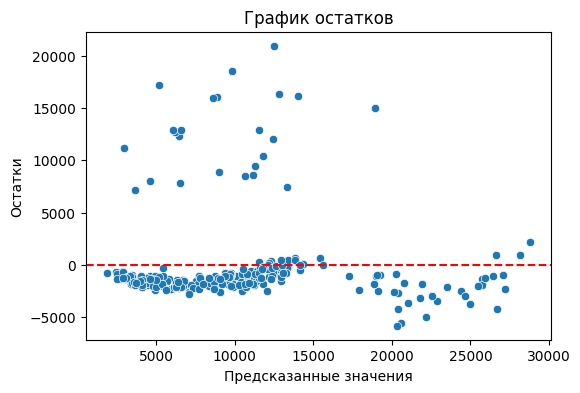

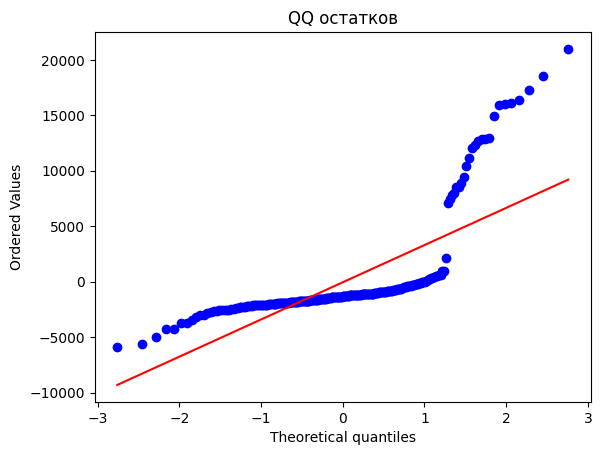

Shapiro Wilk остатков: статистика 0.558, p^0.000


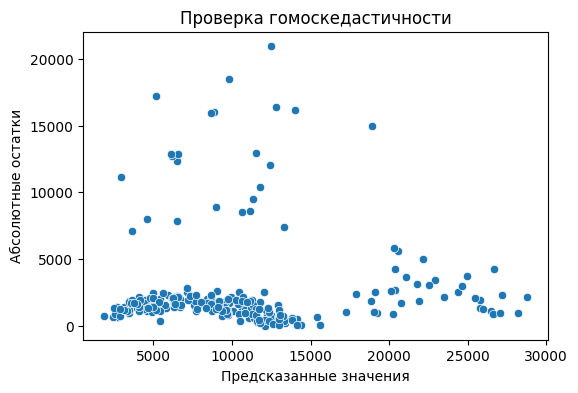

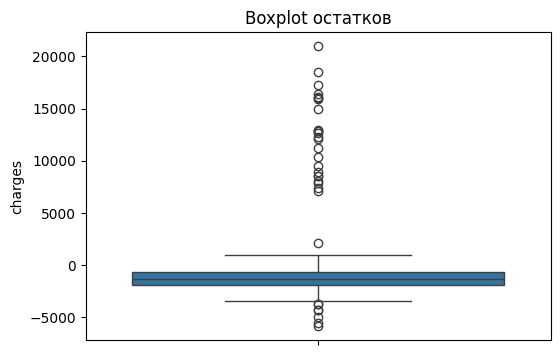

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

df = pd.read_csv("insurance_preprocessed.csv")

df_final = df.copy()

X = df_final.drop(columns=['charges'])
y = df_final['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('График остатков')
plt.show()

plt.figure()
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ остатков")
plt.show()

shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro Wilk остатков: статистика {shapiro_stat:.3f}, p^{shapiro_p:.3f}")

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.xlabel('Предсказанные значения')
plt.ylabel('Абсолютные остатки')
plt.title('Проверка гомоскедастичности')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(residuals)
plt.title('Boxplot остатков')
plt.show()

## Задание 8: Визуализация результатов

1. Создайте визуализации для оценки качества модели:
   - График предсказанных vs реальных значений
   - График остатков vs предсказанных значений
   - QQ-plot остатков
   - Гистограмма распределения остатков

2. Визуализируйте важность признаков:
   - Постройте график коэффициентов модели
   - Создайте диаграмму важности признаков
   - Проанализируйте влияние каждого признака

3. Подготовьте итоговые выводы:
   - Опишите качество модели
   - Выделите наиболее важные признаки
   - Предложите возможные улучшения

## Бонусное задание

1. Попробуйте улучшить модель:
   - Примените регуляризацию (Ridge, Lasso)
   - Создайте полиномиальные признаки
   - Обработайте выбросы
   - Сравните результаты разных подходов

2. Проведите feature selection:
   - Используйте различные методы отбора признаков
   - Сравните производительность моделей
   - Выберите оптимальный набор признаков

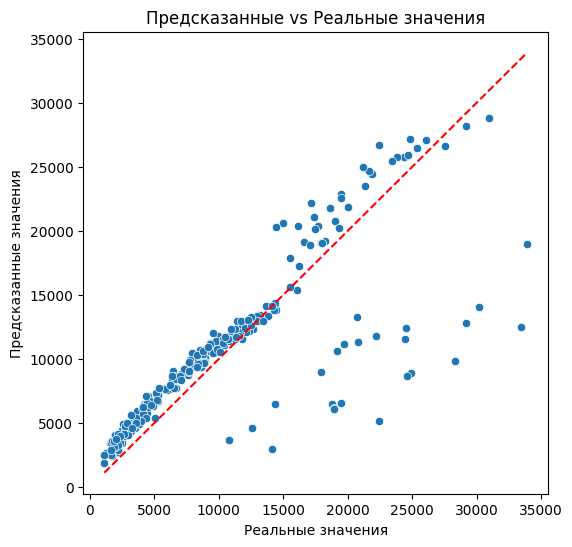

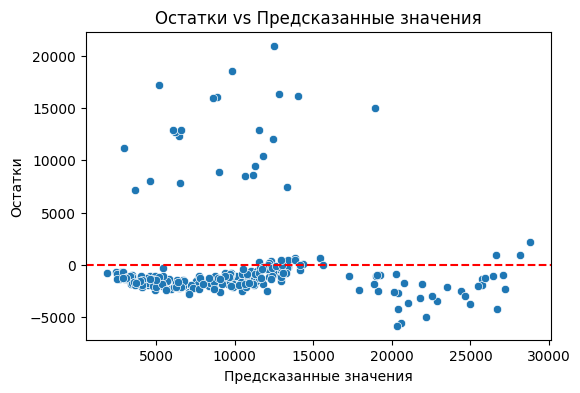

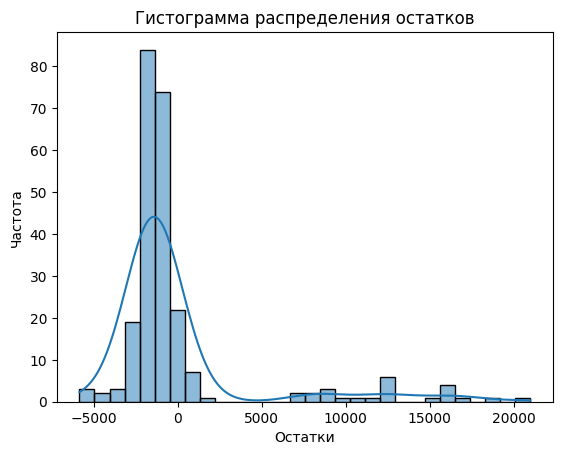

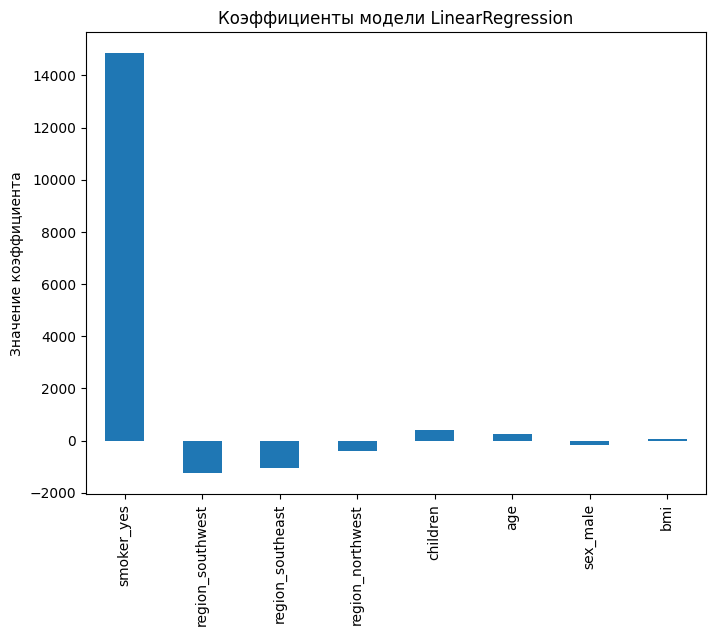

C:\Users\petrk\AppData\Local\Temp\ipykernel_20808\1344629116.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.values, y=coefficients.index, palette="viridis")


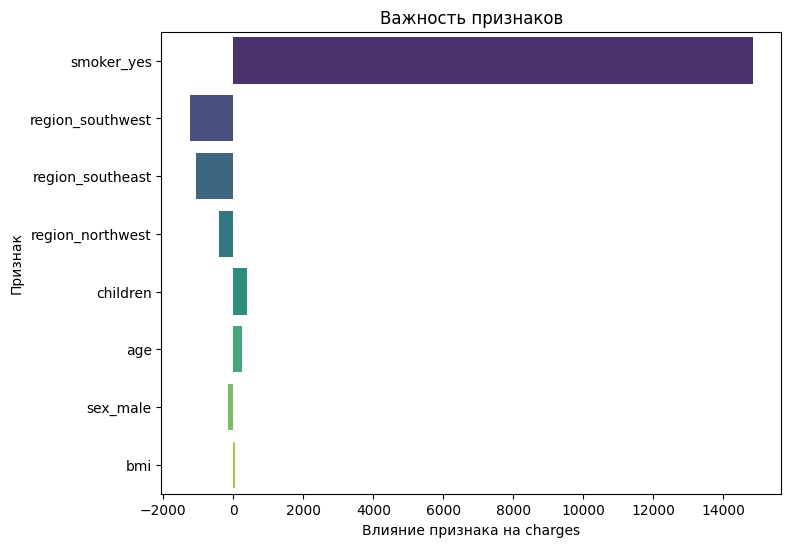

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

df = pd.read_csv("insurance_preprocessed.csv")

df_final = df.copy()

X = df_final.drop(columns=['charges'])
y = df_final['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

residuals = y_test - y_pred

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Предсказанные vs Реальные значения')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки')
plt.title('Остатки vs Предсказанные значения')
plt.show()

plt.figure()
sns.histplot(residuals, bins=30, kde=True)
plt.title("Гистограмма распределения остатков")
plt.xlabel("Остатки")
plt.ylabel("Частота")
plt.show()

coefficients = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)

plt.figure(figsize=(8,6))
coefficients.plot(kind='bar')
plt.title("Коэффициенты модели LinearRegression")
plt.ylabel("Значение коэффициента")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x=coefficients.values, y=coefficients.index, palette="viridis")
plt.xlabel("Влияние признака на charges")
plt.ylabel("Признак")
plt.title("Важность признаков")
plt.show()